In [1]:
%matplotlib widget

In [ ]:
%matplotlib inline

# Session 3

## X-ray source parameters ![gVXR](img/gvxr_logo.png)

## Authors: Ben Thorpe, Iwan Mitchel and Franck Vidal

(version 1.0, 22 Sep 2022)

# Aims of this session

- Create X-ray sources of different shapes:
    - Parallel beam (e.g. synchrotron);
    - Cone-beam (e.g. X-ray tube);
        - Ideal case, i.e. infinitesimal point source;
        - Focal spot, i.e. more realistic.
- Visualise the source shape;
- Set the beam spectrum:
    - Monochromatic;
    - Polychromatic:
        - By hand;
        - Using a text file;
        - Using [xpecgen](https://github.com/Dih5/xpecgen) (a python package to calculate x-ray spectra generated in tungsten anodes using the model of [Med. Phys. 43, 4655.](https://doi.org/10.1118/1.4955120)).

# Task 1: Initialise the simulation environment

At this stage, we should be able to set up the simulation environment.

1. Import the packages;
2. Create the OpenGL context with `gvxr.createWindow`;
3. Set the detector with `gvxr.setDetectorPosition`;
4. Set the detector up vector with `gvxr.setDetectorUpVector`;
5. Set the number of pixels with `gvxr.setDetectorNumberOfPixels`;
6. Set the pixel spacing with `gvxr.setDetectorPixelSize`;
7. Load the following samples.

---

## Step 1 of Task 1: Import the packages

We must import the Python packages as follows:

```python
import matplotlib.pyplot as plt # Plotting`
from matplotlib.colors import LogNorm # Look up table`
from matplotlib.colors import PowerNorm # Look up table`

from gvxrPython3 import gvxr # Simulate X-ray images`

from gvxrPython3.utils import visualise # Visualise the 3D environment if k3D is supported
from gvxrPython3.utils import plotScreenshot # Visualise the 3D environment using Matplotlib
from gvxrPython3.utils import loadSpectrumSpekpy # Generate and load an X-ray spectrum using Spekpy
from gvxrPython3.utils import loadXpecgenSpectrum # Generate and load an X-ray spectrum using xpecgen
```

In [4]:
import matplotlib.pyplot as plt # Plotting`
from matplotlib.colors import LogNorm # Look up table`
from matplotlib.colors import PowerNorm # Look up table`

from gvxrPython3 import gvxr # Simulate X-ray images`
import gvxrPython3.utils

from gvxrPython3.utils import visualise # Visualise the 3D environment if k3D is supported
from gvxrPython3.utils import plotScreenshot # Visualise the 3D environment using Matplotlib
from gvxrPython3.utils import loadSpectrumSpekpy # Generate and load an X-ray spectrum using Spekpy
from gvxrPython3.utils import loadXpecgenSpectrum # Generate and load an X-ray spectrum using xpecgen

---

## Step 2 of Task 1: Create the OpenGL context

We may use `gvxr.createWindow`.

In [5]:
window_id = 0
visible = False
opengl_major_version = 4
opengl_minor_version = 5
backend = "EGL"
gvxr.createWindow(window_id, visible, backend, opengl_major_version, opengl_minor_version);

Thu Oct  6 16:54:05 2022 ---- Create window (ID: 0)
Thu Oct  6 16:54:05 2022 ---- Query the number of EGL devices
Thu Oct  6 16:54:05 2022 ---- Success
Thu Oct  6 16:54:05 2022 ---- Detected 2 EGL devices.
Thu Oct  6 16:54:05 2022 ---- Print the details here of every EGL device.
Thu Oct  6 16:54:05 2022 ---- Success
Thu Oct  6 16:54:05 2022 ---- Device 1/2:
Thu Oct  6 16:54:05 2022 ---- 	Device Extensions: EGL_NV_device_cuda EGL_EXT_device_drm EGL_EXT_device_drm_render_node EGL_EXT_device_query_name EGL_EXT_device_persistent_id
Thu Oct  6 16:54:05 2022 ---- 	Device vendor: NVIDIA
Thu Oct  6 16:54:05 2022 ---- 	Failed to retrieve EGL DRM device file.
Thu Oct  6 16:54:05 2022 ---- Device 2/2:
Thu Oct  6 16:54:05 2022 ---- 	Device Extensions: EGL_MESA_device_software
Thu Oct  6 16:54:05 2022 ---- 	Failed to retrieve device vendor.
Thu Oct  6 16:54:05 2022 ---- 	Failed to retrieve EGL DRM device file.
Thu Oct  6 16:54:05 2022 ---- EGL client extensions: EGL_EXT_platform_base EGL_EXT_device

---

## Step 3 of Task 1: Set the detector position

We must use `gvxr.setDetectorPosition`. The detector position is x = 0.0 cm, y = 0.0 cm and z = -5.0 cm.

In [6]:
gvxr.setDetectorPosition(0, 0, -5, "cm")

--- 

## Step 4 of Task 1: Set the detector up vector

Call `gvxr.setDetectorUpVector(ix, jy, kz)` with `ix`, `jy`, `kz` defining a unit vector defines the 3D orientation of the 2D detector. 
In this example, `ix` = 0, `jy` = 1, and `kz` = 0.

In [7]:
gvxr.setDetectorUpVector(0, 1, 0)

--- 

## Step 5 of Task 1: Set the number of pixels

We want to create a detector with 600 pixels along both directions. 
For this purpose, we use `gvxr.setDetectorNumberOfPixels`.


In [8]:
gvxr.setDetectorNumberOfPixels(600, 600)

--- 

## Step 6 of Task 1: Set the pixel spacing

The space between the centre of two successive pixel is 0.25 mm along both directions. We must use `gvxr.setDetectorPixelSize`.

In [9]:
gvxr.setDetectorPixelSize(0.25, 0.25, "mm")

--- 

## Step 7 of Task 1: Load the samples and their material properties

The sample is made of 6 components, a matrix with spherical inserts of various material. 

| Label | fname | Material type | Material | Density |
|-------|-------|---------------|----------|---------|
| Matrix | `input_data/plate_sphere_inserts/phantoms/matrix.stl` | Element | C | N/A |
| Col_0 | `input_data/plate_sphere_inserts/phantoms/col_0.stl` | Element | Cu | N/A |
| Col_1 | `input_data/plate_sphere_inserts/phantoms/col_1.stl` | Element | Al | N/A |
| Col_2 | `input_data/plate_sphere_inserts/phantoms/col_2.stl` | Compound | SiC | 3.2 g/cm3 |
| Col_3 | `input_data/plate_sphere_inserts/phantoms/col_3.stl` | Mixture | Ti90Al6V4 | 4.42 g/cm3 |
| Col_4 | `input_data/plate_sphere_inserts/phantoms/col_4.stl` | Element | Fe | N/A |

Load all the corresponding STL files using `gvxr.loadMeshFile`. The vertex data in the STL files is stored in mm.
Depending on the type of material, we must use `gvxr.setElement`, `gvxr.setCompound`, `gvxr.setMixture`, and `gvxr.setDensity`.

In [10]:
gvxr.loadMeshFile("Matrix", "input_data/phantoms/plate_sphere_inserts/matrix.stl", "mm")
gvxr.loadMeshFile("Col_0", "input_data/phantoms/plate_sphere_inserts/col_0.stl", "mm")
gvxr.loadMeshFile("Col_1", "input_data/phantoms/plate_sphere_inserts/col_1.stl", "mm")
gvxr.loadMeshFile("Col_2", "input_data/phantoms/plate_sphere_inserts/col_2.stl", "mm")
gvxr.loadMeshFile("Col_3", "input_data/phantoms/plate_sphere_inserts/col_3.stl", "mm")
gvxr.loadMeshFile("Col_4", "input_data/phantoms/plate_sphere_inserts/col_4.stl", "mm")

gvxr.setElement("Matrix", "C");

gvxr.setElement("Col_0", "Cu")
gvxr.setElement("Col_1", "Al")

gvxr.setCompound("Col_2", "SiC");
gvxr.setDensity("Col_2",3.2, "g/cm3");

gvxr.setMixture("Col_3", "Ti90Al6V4");
gvxr.setDensity("Col_3", 4.42, "g/cm3");

gvxr.setElement("Col_4", "Fe")

Thu Oct  6 16:54:09 2022 ---- file_name:	input_data/phantoms/plate_sphere_inserts/matrix.stl	nb_faces:	9702	nb_vertices:	29106	bounding_box (in cm):	(-3.5, -3.5, -0.75)	(3.5, 3.5, 0.75)
Thu Oct  6 16:54:09 2022 ---- file_name:	input_data/phantoms/plate_sphere_inserts/col_0.stl	nb_faces:	1938	nb_vertices:	5814	bounding_box (in cm):	(-2.99606, -2.19961, -0.496354)	(-2, 2.49901, 0.496354)
Thu Oct  6 16:54:09 2022 ---- file_name:	input_data/phantoms/plate_sphere_inserts/col_1.stl	nb_faces:	1938	nb_vertices:	5814	bounding_box (in cm):	(-1.74606, -2.19961, -0.496354)	(-0.75, 2.49901, 0.496354)
Thu Oct  6 16:54:09 2022 ---- file_name:	input_data/phantoms/plate_sphere_inserts/col_2.stl	nb_faces:	1938	nb_vertices:	5814	bounding_box (in cm):	(-0.496057, -2.19961, -0.496354)	(0.5, 2.49901, 0.496354)
Thu Oct  6 16:54:09 2022 ---- file_name:	input_data/phantoms/plate_sphere_inserts/col_3.stl	nb_faces:	1938	nb_vertices:	5814	bounding_box (in cm):	(0.753943, -2.19961, -0.496354)	(1.75, 2.49901, 0.496

# Change the colour of the matrix

The matrix embeds inner objects that are not visible in the 3D visualisation if its surface is fully opaque. 
We can change the colour of the matrix using `gvxr.setColour(ID, red, green, blue, opacity)`, making sure `opacity` is below 1.

In [11]:
red = 102 / 255
green = 255 / 255
blue = 153 / 255
opacity = 0.1 # Transparent: 0, opaque: 1
gvxr.setColour("Matrix", red, green, blue, opacity)

# Shape of the X-ray source

As of today, gVXR supports 3 different source shapes:

- Parallel beam;
- Cone-beam:
    - Ideal case, i.e. infinitesimal point source;
    - Focal spot, i.e. more realistic.

The parallel beam geometry corresponds to synchrotron sources. 
To create one, set the source position with `gvxr.setSourcePosition`, then call `gvxr.useParallelBeam()`.

The cone-beam geometry corresponds to X-ray tubes. There are two cases. The first one is an infinitesimal point source. 
To create one, set the source position with `gvxr.setSourcePosition`, then call `gvxr.usePointSource()`. The image is sharp. 

However, it is more realistic to consider the actual focal spot size of the X-ray tube ([click for more details](https://www.creatis.insa-lyon.fr/~letang/x-ray-book/instrumentation.html#image-primitives). In reality, X-ray projections are blured. The blurring is due to i) the detector itself (the inherent unsharpnness) and we will see that in detail in the next Notebook, and ii) the non-punctuality of the source of radiation (geometric unsharpness). 

![geometric unsharpness](img/Unsharpness1.jpg)

To create one, set the source position with `gvxr.setSourcePosition`, then call `gvxr.setFocalSpot(px, py, pz, s, units, N)`.
`px`, `py`, and `pz` are three floating-point values used to set the size centre of the focal spot, and `s` the sie of the focal spot. `units` is a unit of length, e.g. `"um"`, `"mm"` or `"cm"`.
In practice, this type of source is implemented by repeating several point sources within the focal spot. Integrating all the correspoding projections creates the geometric unsharpness. `N` is the number of sub-sources for each axis. 

<div class="alert alert-block alert-warning">
    <b>Note:</b> For one X-ray projection using the focal spot size, N<sup>3</sup> simulations with point sources are performed and integrated. If N is high, the simulation runtime will increase.
</div>



Before we carry on, we make sure to zoom in in the 3D visualisation.

In [12]:
gvxr.setZoom(500)

---

### Task:

1. Set a monochromatic source. The photon energy is 100 keV. We use could `gvxr.setMonoChromatic(100,"keV",1)`;
2. Use a point source;
3. Set the source position to (0, 0, 20, "cm");
4. Compute an X-ray image and store it in a variable called `xray_image_point_source`;
5. Render the 3D visualisation with `gvxr.displayScene()`;
6. Take a screenshot with `gvxr.takeScreenshot()` and store it in a variable called `screenshot_point_source`.

In [13]:
gvxr.setMonoChromatic(100, "keV", 1)
gvxr.usePointSource()
gvxr.setSourcePosition(0, 0, 20, "cm")
xray_image_point_source = gvxr.computeXRayImage()
gvxr.displayScene()
screenshot_point_source = gvxr.takeScreenshot()

Thu Oct  6 16:54:11 2022 ---- Initialise the renderer


---

### Task:

1. Use a parallel source;
2. Compute an X-ray image and store it in a variable called `xray_image_parallel_source`;
3. Render the 3D visualisation with `gvxr.displayScene()`;
4. Take a screenshot with `gvxr.takeScreenshot()` and store it in a variable called `screenshot_parallel_source`.

In [14]:
gvxr.useParallelSource()
xray_image_parallel_source = gvxr.computeXRayImage()
gvxr.displayScene()
screenshot_parallel_source = gvxr.takeScreenshot()

---

### Task:

1. Use a cone-beam geometry with a focal spot of 0.5 cm along the 3 axes. Its position is (0, 0, 20, "cm"). Use $3 \times 3 \times 3$ sub-sources, i.e. `N` = 3;
2. Compute an X-ray image and store it in a variable called `xray_image_focal_spot`;
3. Render the 3D visualisation with `gvxr.displayScene()`;
4. Take a screenshot with `gvxr.takeScreenshot()` and store it in a variable called `screenshot_focal_spot`.

In [15]:
gvxr.setFocalSpot(0, 0, 20, 0.5, "cm", 3)
xray_image_focal_spot = gvxr.computeXRayImage()
gvxr.displayScene()
screenshot_focal_spot = gvxr.takeScreenshot()

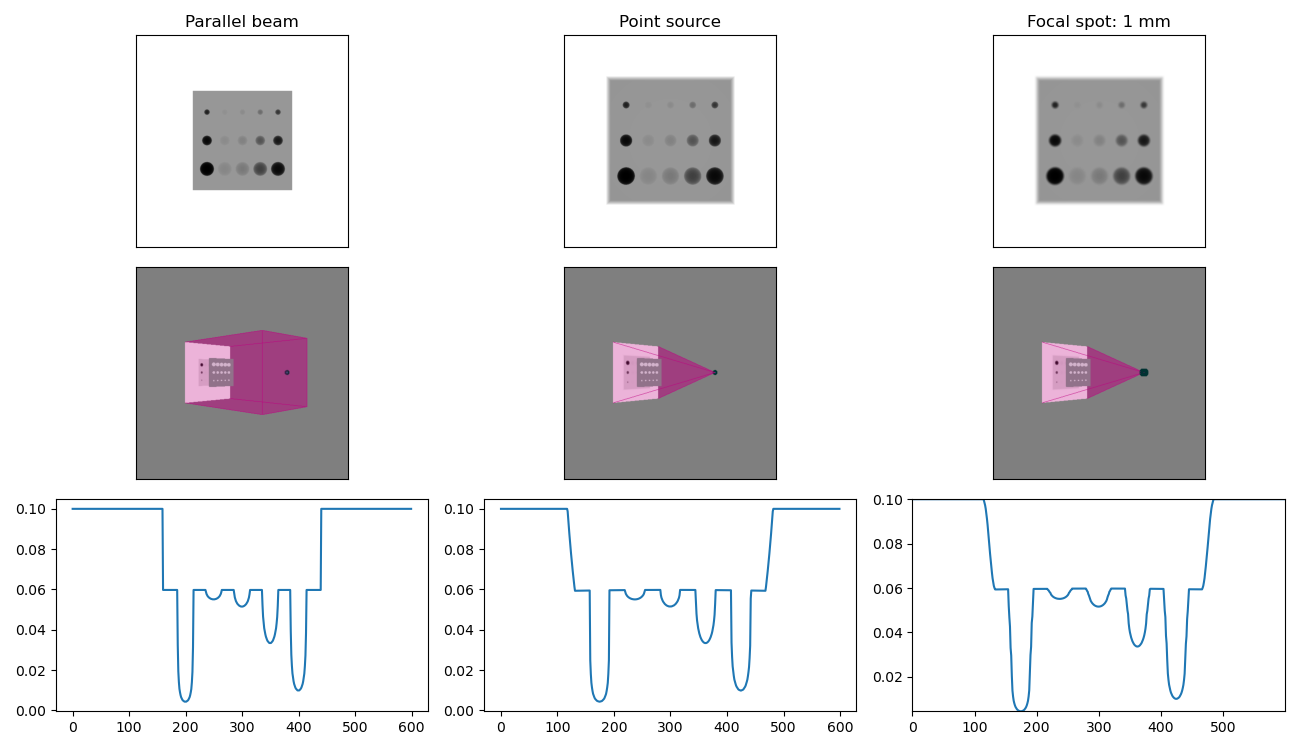

In [16]:
fig, axs = plt.subplots(3, 3, figsize=(13, 7.5))

axs[0, 0].imshow(xray_image_parallel_source, cmap="gray")
axs[0, 0].set_title("Parallel beam")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(xray_image_point_source, cmap="gray")
axs[0, 1].set_title("Point source")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[0, 2].imshow(xray_image_focal_spot, cmap="gray")
axs[0, 2].set_title("Focal spot: 1 mm")
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([])

axs[1, 0].imshow(screenshot_parallel_source)
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(screenshot_point_source)
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

axs[1, 2].imshow(screenshot_focal_spot)
axs[1, 2].set_xticks([])
axs[1, 2].set_yticks([])

axs[2, 0].plot(xray_image_parallel_source[300])
axs[2, 1].plot(xray_image_point_source[300])
axs[2, 2].plot(xray_image_focal_spot[300])

plt.tight_layout()
plt.margins(0,0)

# X-ray spectrum



# X-ray spectra

## Monochromatic

## Polychromatic

### Synchrotron

### X-ray tube

The cell below makes it possible to calculate spectra as generated by the [X-ray generators](https://www.creatis.insa-lyon.fr/~letang/x-ray-book/instrumentation.html#x-ray-production) by specifying:
- the high voltage U of electrons acceleration,
- the thickness and the nature of the plate inserted.

---
Task:

1. Click on "Run Interact" below to generate the X-ray spectrum of an X-ray tube with a tungsten anode for a 100 kV tube voltage.
2. Change the tube voltage to 90 kV and click on "Run Interact". How did the figure change?
3. Change the tube voltage to 80 kV and click on "Run Interact". How did the figure change?
4. Change it back to 100 kV and add a plate of 5mm of copper, then click on "Run Interact". How did the figure change compare to the initial spectrum without the copper plate?

These plates are called "filters". They are used to "clean" the spectra and make them more "monochromatic".

In [17]:
import ipywidgets as widgets
import utilities
widgets.interact_manual(utilities.spectrum,E0=widgets.IntText(value=100,step=1,description="High voltage (kV):",disabled=False,style={'description_width': 'initial'}),Mat_Z=widgets.Dropdown(options=[('Water',-1),('Aluminium',13),('Copper',29),('Lead',82)],value=-1,layout={'width': 'max-content'},description='Material:',style={'description_width': 'initial'}),Mat_X=widgets.FloatText(value=0.,step=0.01,description="Thickness (mm):",disabled=False,style={'description_width': 'initial'}));

interactive(children=(IntText(value=100, description='High voltage (kV):', style=DescriptionStyle(description_…

In [24]:
spectrum1, k1, f1, unit = loadXpecgenSpectrum(80)

In [25]:
spectrum2, k2, f2, unit = loadXpecgenSpectrum(100)

In [26]:
spectrum3, k3, f3, unit = loadXpecgenSpectrum(100, filters=[["Cu", 5]])

In [22]:
xray_image_focal_spot = gvxr.computeXRayImage()
gvxr.displayScene()
screenshot_focal_spot = gvxr.takeScreenshot()

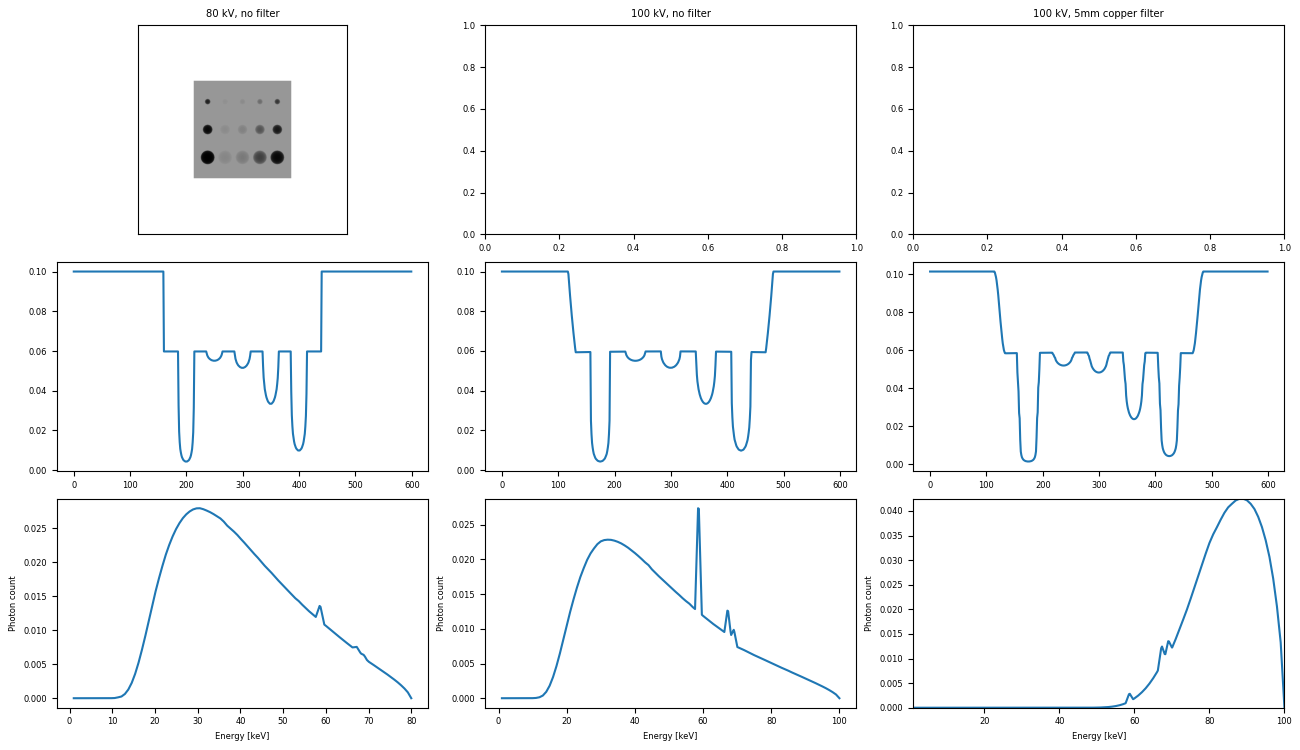

In [29]:
fig, axs = plt.subplots(3, 3, figsize=(13, 7.5))

axs[0, 0].imshow(xray_image_parallel_source, cmap="gray")
axs[0, 0].set_title("80 kV, no filter")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

# axs[0, 1].imshow(xray_image_point_source, cmap="gray")
axs[0, 1].set_title("100 kV, no filter")
# axs[0, 1].set_xticks([])
# axs[0, 1].set_yticks([])

# axs[0, 2].imshow(xray_image_focal_spot, cmap="gray")
axs[0, 2].set_title("100 kV, 5mm copper filter")
# axs[0, 2].set_xticks([])
# axs[0, 2].set_yticks([])

axs[1, 0].plot(xray_image_parallel_source[300])
axs[1, 1].plot(xray_image_point_source[300])
axs[1, 2].plot(xray_image_focal_spot[300])

axs[2, 0].plot(k1, f1)
axs[2, 0].set_xlabel("Energy [" + unit + "]")
axs[2, 0].set_ylabel("Photon count")

axs[2, 1].plot(k2, f2)
axs[2, 1].set_xlabel("Energy [" + unit + "]")
axs[2, 1].set_ylabel("Photon count")

axs[2, 2].plot(k3, f3)
axs[2, 2].set_xlabel("Energy [" + unit + "]")
axs[2, 2].set_ylabel("Photon count")




plt.tight_layout()
plt.margins(0,0)